In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [146]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

In [147]:
#columns to be dropped
dropped_columns = ['id','date','view','zipcode','sqft_living15','sqft_lot15']

In [148]:
#df.loc[(df.lat <47.2) & (df.long > -121.8)]
# want to use longitudes less than -121.647

In [149]:
#plt.scatter(df.long,df.lat)

In [150]:
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Dropping Unwanted Columns

In [151]:
df = df.drop(columns=dropped_columns)

In [152]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

In [153]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842
lat :  0
long :  0


In [154]:
df.waterfront.isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [155]:
df.waterfront[0]

nan

In [156]:
df.yr_renovated.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [157]:
df.yr_renovated[2]

nan

## filling NA with 0, converting these to categorical later if needed

In [158]:
df = df.fillna(0)

In [159]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0
lat :  0
long :  0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 2.5+ MB


In [161]:
df.loc[df.sqft_basement == '?']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,47.3097,-122.327
18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,?,1921,0.0,47.3089,-122.210
42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,?,2014,0.0,47.6848,-122.016
79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,?,2002,0.0,47.3420,-122.025
112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,?,1980,0.0,47.3624,-122.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,504600.0,5,3.00,2360,5000,1.0,0.0,3,7,1390,?,2008,0.0,47.6931,-122.330
21447,337500.0,4,2.50,2330,4907,2.0,0.0,3,7,2330,?,2013,0.0,47.3590,-122.081
21473,352500.0,2,2.50,980,1010,3.0,0.0,3,8,980,?,2008,0.0,47.6844,-122.387
21519,332000.0,4,2.50,2380,5737,2.0,0.0,3,7,2380,?,2010,0.0,47.2815,-122.356


In [162]:
df = df.replace(to_replace="?",value=0)

In [163]:
df.sqft_basement = df.sqft_basement.astype(float)

In [164]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [165]:
#handling the 33 bedrooms

In [166]:
df = df.drop(df.loc[df.bedrooms ==33].index)

# Exploring the Data

## Visualizations

In [167]:
len(df.columns)

15

In [168]:
sns.set_style("darkgrid")

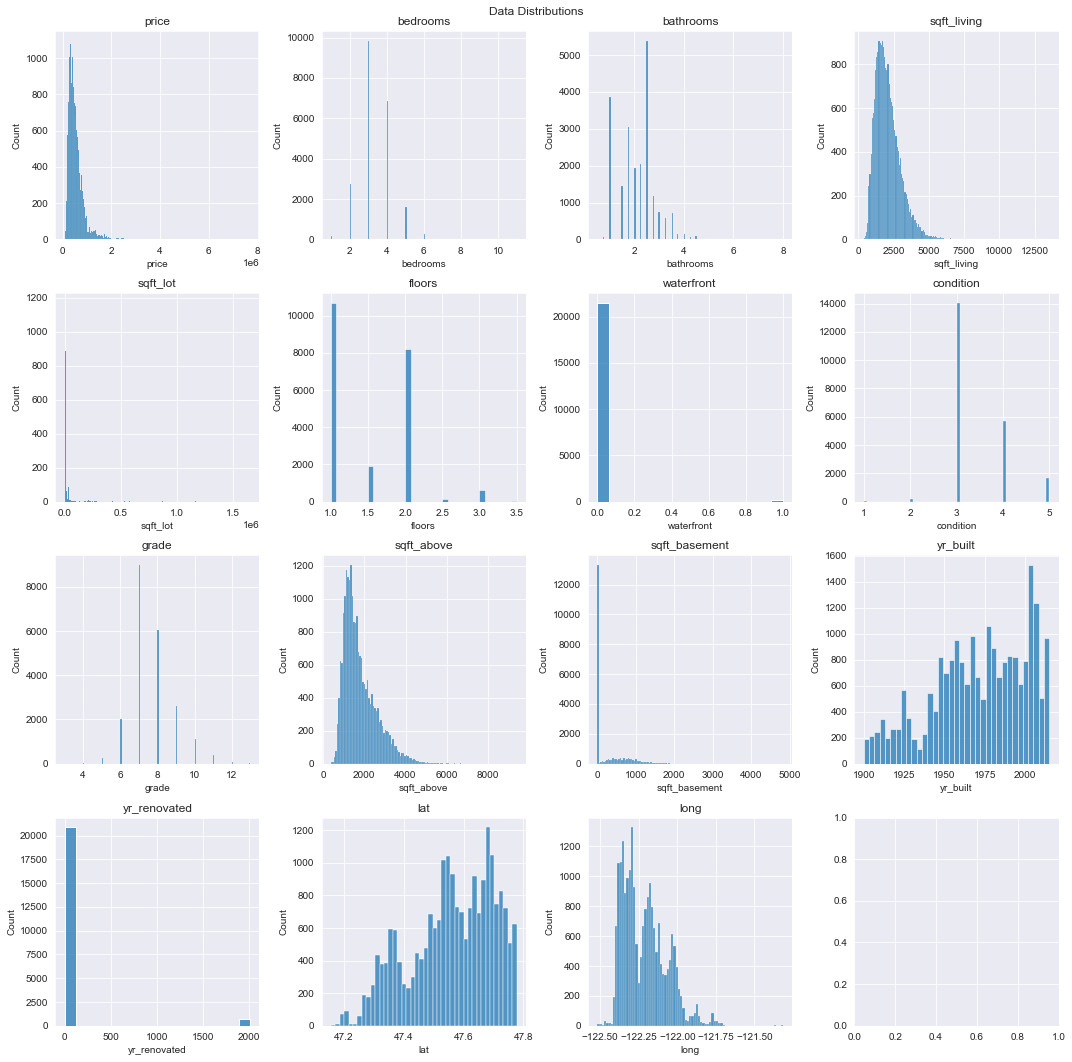

In [169]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

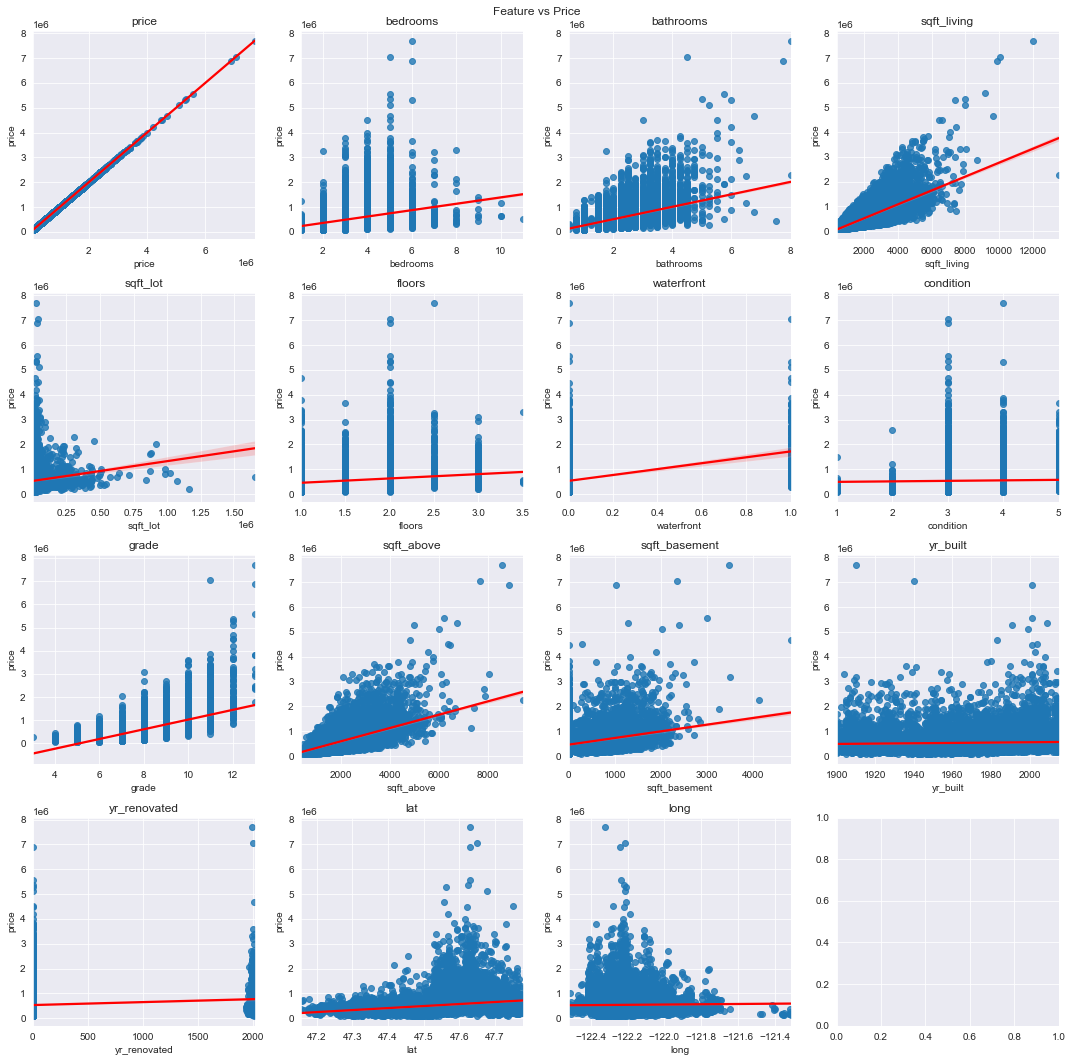

In [170]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='price', data=df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [171]:
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


# Findings HERE

# Generating / Modifying Features

In [172]:
mod_df = df

## Price Per Square Foot (PSF) using sqft_above

In [173]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

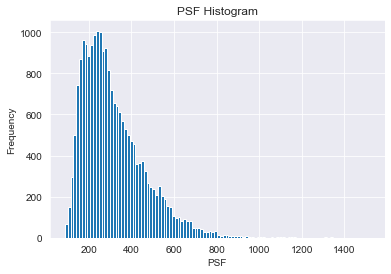

In [174]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

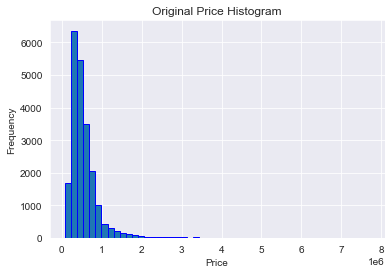

In [175]:
plt.hist(mod_df['price'], bins=50, ec = 'blue');
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

## Living to Lot Sqft Ratio

In [176]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

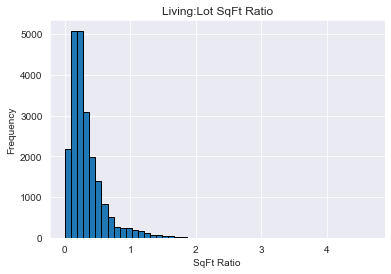

In [177]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Basement to Categorical

In [178]:
mod_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [179]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0

In [180]:
mod_df['has_basement']

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: has_basement, Length: 21596, dtype: bool

In [181]:
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [182]:
mod_df['has_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: has_basement, Length: 21596, dtype: int32

## Renovation Year to Categorical

In [183]:
# Using 27 years as a cutoff between recent renovations

In [184]:
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [185]:
mod_df['rec_reno']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: rec_reno, Length: 21596, dtype: int32

## Adding Geo Locations

In [143]:
# Added after initial modeling failed

In [191]:
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    #North Label
    if lat > 47.5:
        return 0
    #South Label
    else:
        return 1

In [200]:
mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21596, dtype: int64

In [201]:
mod_df['location'] = mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

In [203]:
mod_df.location.value_counts()

0    14976
1     6602
2       18
Name: location, dtype: int64

## Dropping features used in modification

In [204]:
add_drop_columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','yr_renovated']

In [205]:
mod_df = mod_df.drop(add_drop_columns,axis=1)

In [206]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno', 'location'],
      dtype='object')

## Modified Data Visualization Checks

In [207]:
len(mod_df.columns)

12

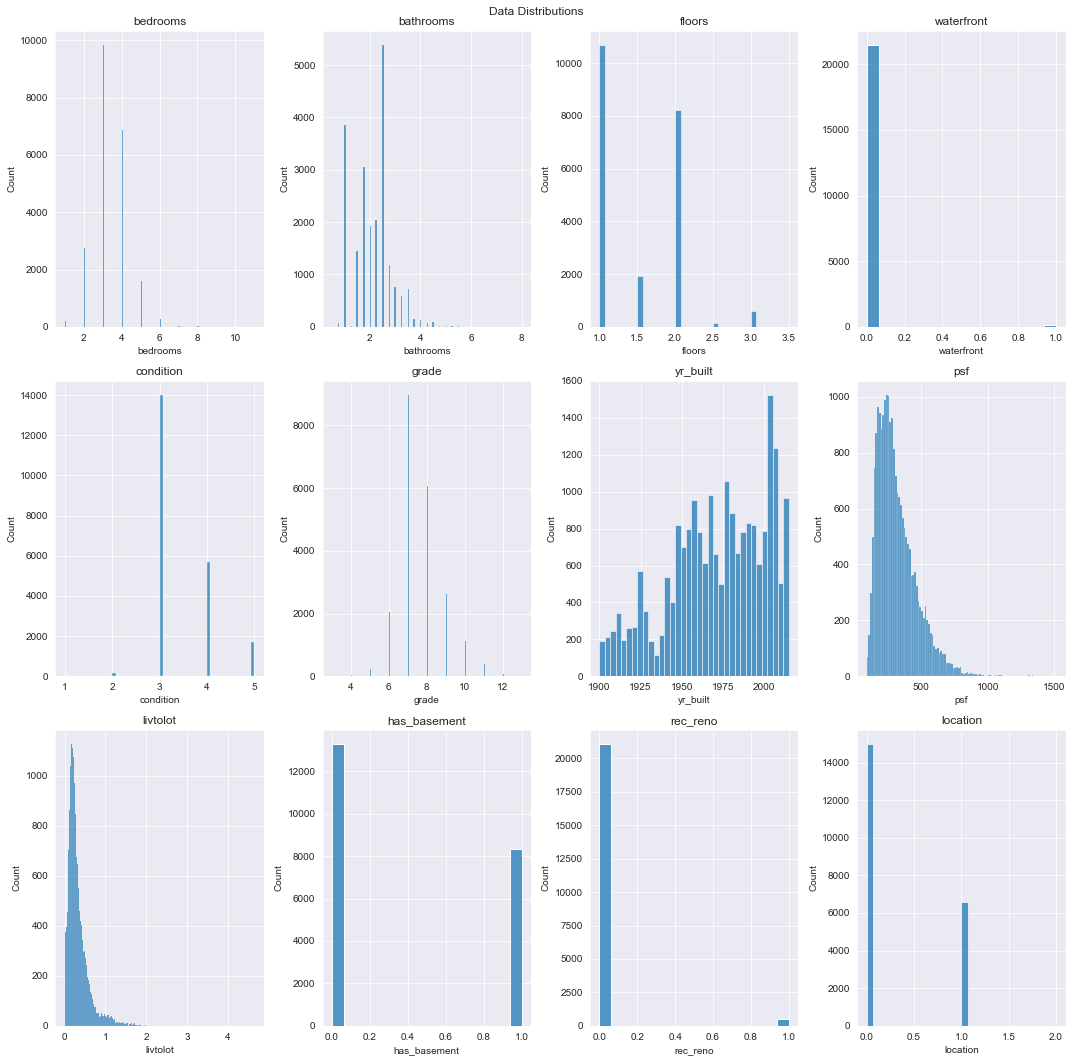

In [208]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(mod_df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

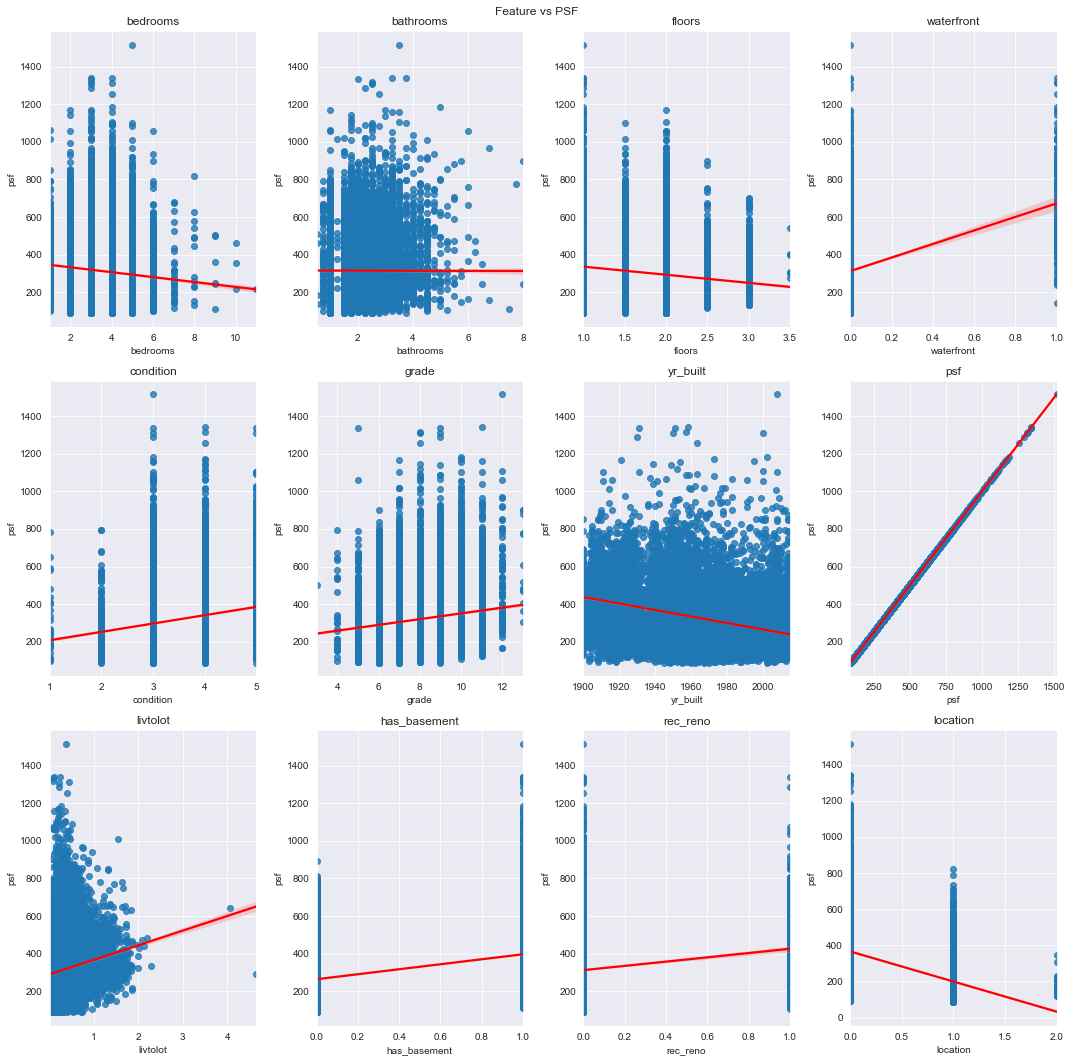

In [209]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=mod_df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs PSF')
    fig.tight_layout()

# Multicollinearity

In [210]:
mod_df.corr() > .75

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno,location
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False
psf,False,False,False,False,False,False,False,True,False,False,False,False
livtolot,False,False,False,False,False,False,False,False,True,False,False,False
has_basement,False,False,False,False,False,False,False,False,False,True,False,False


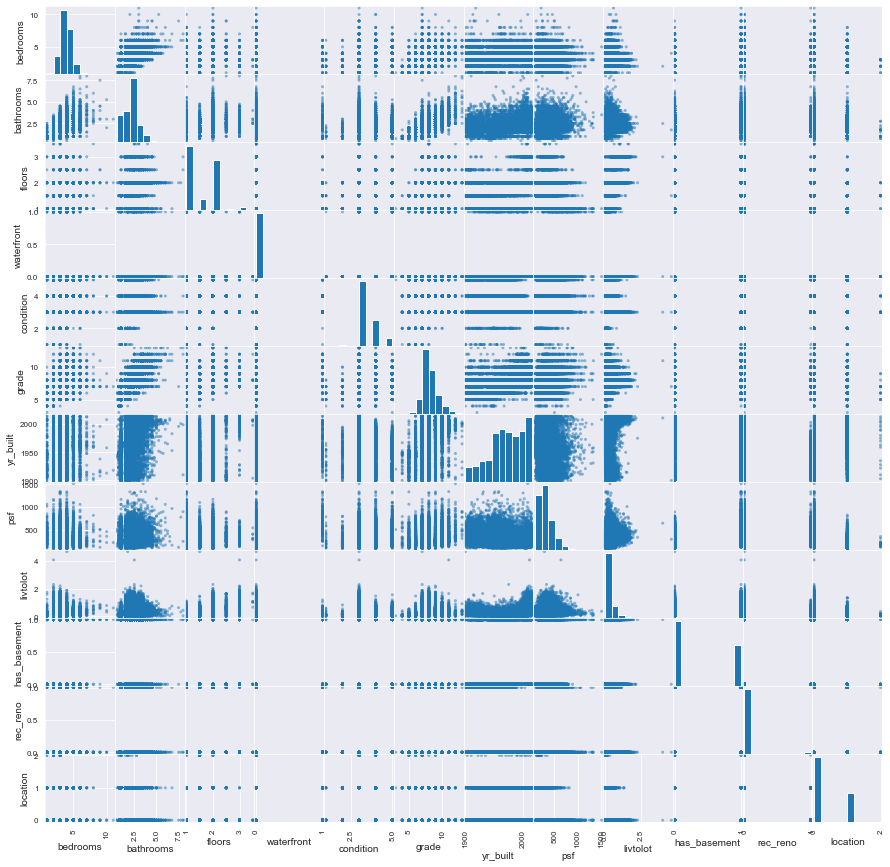

In [211]:
pd.plotting.scatter_matrix(mod_df, figsize = [15,15]);

In [212]:
mod_df.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno,location
bedrooms,1.000000,0.527870,0.183707,-0.002054,0.023440,0.366174,0.160736,-0.080011,0.027760,0.160391,0.031587,-0.001680
bathrooms,0.527870,1.000000,0.502574,0.063628,-0.126443,0.665834,0.507166,-0.001580,0.287012,0.159897,0.068413,-0.069740
floors,0.183707,0.502574,1.000000,0.020794,-0.264013,0.458783,0.489175,-0.157565,0.556703,-0.252426,0.007508,-0.095481
waterfront,-0.002054,0.063628,0.020794,1.000000,0.016659,0.082817,-0.024491,0.200274,-0.029807,0.039227,0.048177,0.006251
condition,0.023440,-0.126443,-0.264013,0.016659,1.000000,-0.146854,-0.361555,0.195401,-0.156500,0.130422,-0.072401,0.008463
grade,0.366174,0.665834,0.458783,0.082817,-0.146854,1.000000,0.447854,0.122061,0.191394,0.050736,0.037696,-0.173778
yr_built,0.160736,0.507166,0.489175,-0.024491,-0.361555,0.447854,1.000000,-0.343812,0.279050,-0.163953,-0.155532,0.147446
psf,-0.080011,-0.001580,-0.157565,0.200274,0.195401,0.122061,-0.343812,1.000000,0.141128,0.438295,0.120508,-0.523555
livtolot,0.027760,0.287012,0.556703,-0.029807,-0.156500,0.191394,0.279050,0.141128,1.000000,0.152112,0.012980,-0.249754
has_basement,0.160391,0.159897,-0.252426,0.039227,0.130422,0.050736,-0.163953,0.438295,0.152112,1.000000,0.049453,-0.163134


## Multicollinearity Findings

In [213]:
# Need to keep an eye on the relationship between Bathrooms, Bedrooms, Floors, and Grade.
# It makes sense that the more floors a home has, the more bathrooms.
# Also, the more bedrooms, the more bathrooms are needed.

# Initial Regression Modeling

In [214]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno', 'location'],
      dtype='object')

In [215]:
mod_categorical = ['waterfront','has_basement','rec_reno']

In [216]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno']]

In [217]:

linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4307271327238401
Test R2:  0.4149833197381819
Train RMSE:  111.42016688811967
Test RMSE:  112.05084387397216


In [218]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    return model.summary()

In [219]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.4307271327238401
Test R2:  0.4149833197381819
Train RMSE:  111.42016688811967
Test RMSE:  112.05084387397216


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1306.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:48:28   Log-Likelihood:            -1.0594e+05
No. Observations:               17276   AIC:                         2.119e+05
Df Residuals:                   17265   BIC:                         2.120e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3839.2725     77.833     49.327      0.000    3686.713    3991.832
bedrooms       -29.4717      1.137    -25.922      0.000     -31.700     -27.243
bathrooms       -0.1866      1.861     -0.100      0.920      -3.835       3.461
floors         -39.8328      2.533    -15.727      0.000     -44.797     -34.868
waterfront     295.8138     10.478     28.231      0.000     275.276     316.352
condition       15.5061      1.432     10.830      0.000      12.700      18.313
grade           46.1281      1.004     45.933      0.000      44.160      48.096
yr_built        -1.9534      0.040    -49.342      0.000      -2.031      -1.876
livtolot       129.4565      4.214     30.720      0.000     121.197     137.716
has_basement    90.6087      2.137     42.391      0.000      86.419      94.798
rec_reno        27.5533      5.646      4.880      0.000      16.486      38.621
==============================================================================
Omnibus:                     3437.155   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11053.121
Skew:                           1.011   Prob(JB):                         0.00
Kurtosis:                       6.356   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:

formula = 'psf ~ bedrooms+bathrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1614.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:48:28   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21585   BIC:                         2.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3873.8488     69.471     55.762      0.000    3737.680    4010.018
C(waterfront)[T.1.0]   279.5992      9.361     29.869      0.000     261.251     297.947
C(has_basement)[T.1]    89.5209      1.913     46.800      0.000      85.772      93.270
C(rec_reno)[T.1]        30.3769      5.056      6.008      0.000      20.466      40.288
bedrooms               -29.9355      1.016    -29.461      0.000     -31.927     -27.944
bathrooms                1.3900      1.672      0.832      0.406      -1.886       4.666
floors                 -38.6242      2.269    -17.020      0.000     -43.072     -34.176
condition               16.3721      1.284     12.755      0.000      13.856      18.888
grade                   45.4981      0.901     50.488      0.000      43.732      47.264
yr_built                -1.9717      0.035    -55.764      0.000      -2.041      -1.902
livtolot               128.3763      3.773     34.027      0.000     120.981     135.771
==============================================================================
Omnibus:                     4619.453   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16156.665
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       6.670   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dropping Bathroom

In [221]:
mod2_df = mod_df.drop('bathrooms',axis=1)

In [222]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod2_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1793.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:48:47   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21586   BIC:                         2.650e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3853.2703     64.914     59.360      0.000    3726.035    3980.506
C(waterfront)[T.1.0]   279.9403      9.352     29.934      0.000     261.610     298.270
C(has_basement)[T.1]    89.9371      1.846     48.714      0.000      86.318      93.556
C(rec_reno)[T.1]        30.9197      5.014      6.167      0.000      21.092      40.748
bedrooms               -29.5950      0.930    -31.825      0.000     -31.418     -27.772
floors                 -38.1580      2.199    -17.353      0.000     -42.468     -33.848
condition               16.4572      1.279     12.862      0.000      13.949      18.965
grade                   45.7977      0.826     55.446      0.000      44.179      47.417
yr_built                -1.9621      0.033    -58.713      0.000      -2.028      -1.897
livtolot               128.3382      3.772     34.020      0.000     120.944     135.733
==============================================================================
Omnibus:                     4623.296   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16177.847
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                       6.673   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings

# Considering other features: Geography

In [120]:
import matplotlib.image as mpimg

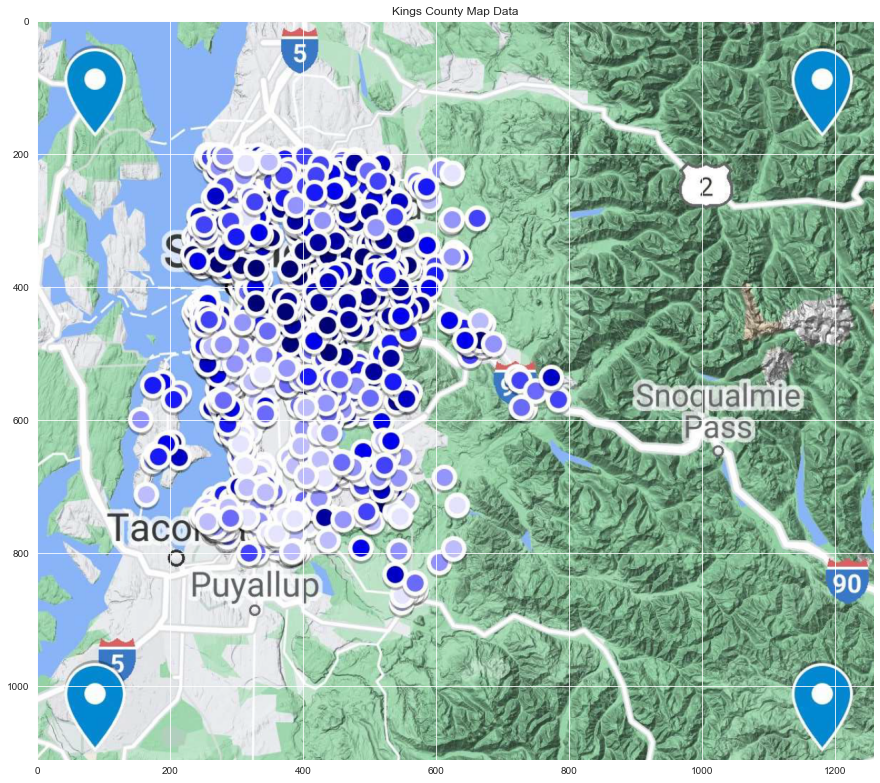

In [131]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

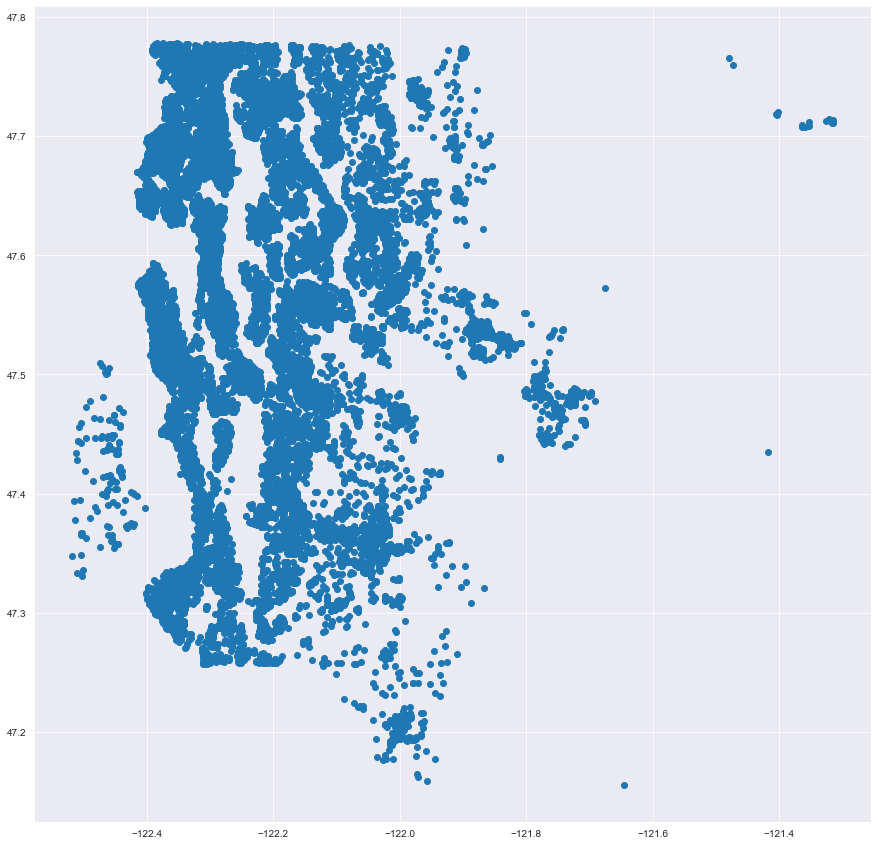

In [132]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df.long,df.lat);

## Geographical findings

In [133]:
## North appears to have more expensive homes.
## There are several homes in the outskirts, such as the mountains, or separate isolated towns
## There are also two islands, Vashon and Mercer Island

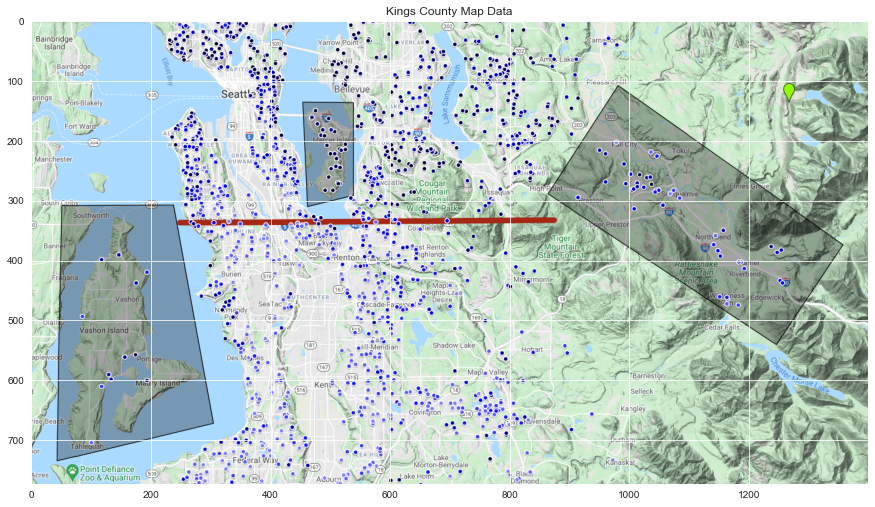

In [135]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map_areas.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

In [137]:
df.loc[(df.lat <47.2) & (df.long > -121.8)].long

3292   -121.646
Name: long, dtype: float64

In [ ]:
# Want to get longitudes greater than -121.647

In [138]:
#keeping it simple, dividing by north, south, and outer Kings County
# North = 0
# South = 1
# Outer = 2
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    if lat > 47.5:
        return 0
    else:
        return 1
    

In [141]:
#test
print(area_split(df.lat[0],df.long[0]))
df.iloc[0]

0


price             221900
bedrooms               3
bathrooms              1
sqft_living         1180
sqft_lot            5650
floors                 1
waterfront             0
condition              3
grade                  7
sqft_above          1180
sqft_basement          0
yr_built            1955
yr_renovated           0
lat              47.5112
long            -122.257
psf              188.051
livtolot         0.20885
has_basement       False
Name: 0, dtype: object

In [142]:
print(area_split(df.lat[3292],df.long[3292]))
df.iloc[3292]

2


price              380000
bedrooms                3
bathrooms            2.25
sqft_living          1860
sqft_lot            15559
floors                  2
waterfront              0
condition               4
grade                   7
sqft_above           1860
sqft_basement           0
yr_built             1963
yr_renovated            0
lat               47.1559
long             -121.646
psf               204.301
livtolot         0.119545
has_basement        False
Name: 3292, dtype: object

In [223]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2362.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:49:21   Log-Likelihood:            -1.2995e+05
No. Observations:               21596   AIC:                         2.599e+05
Df Residuals:                   21584   BIC:                         2.600e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2605.1511     60.155     43.308      0.000    2487.244    2723.059
C(waterfront)[T.1.0]   301.8404      8.334     36.220      0.000     285.506     318.175
C(has_basement)[T.1]    82.3077      1.647     49.962      0.000      79.079      85.537
C(rec_reno)[T.1]        44.2116      4.469      9.893      0.000      35.452      52.971
C(location)[T.1]      -121.9649      1.626    -75.018      0.000    -125.152    -118.778
C(location)[T.2]      -114.7953     23.473     -4.891      0.000    -160.804     -68.787
bedrooms               -25.4478      0.830    -30.648      0.000     -27.075     -23.820
floors                 -37.6723      1.959    -19.229      0.000     -41.512     -33.832
condition               21.9856      1.142     19.255      0.000      19.748      24.224
grade                   31.3317      0.761     41.196      0.000      29.841      32.822
yr_built                -1.2599      0.031    -40.384      0.000      -1.321      -1.199
livtolot                70.1122      3.449     20.327      0.000      63.351      76.873
==============================================================================
Omnibus:                     6178.295   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30264.783
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.179   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""